In [1]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import koreanize_matplotlib      # 한글 폰트 깨짐 방지


In [3]:
# 1. 데이터프레임 생성 및 저장
data = {
    '이름': ['안준호', '이수진', '김민재', '최서연', '박지훈', '유하늘', '서예린'],
    '교과목': ['과학', '영어', '수학', '과학', '국어', '수학', '영어'],
    '세부능력및특기사항': [
        '탐구능력이 뛰어남',
        '발표력이 좋고 문장 구성력이 뛰어남',
        '문제 해결 과정에 끈기가 있음',
        '탐구능력이 뛰어남',
        '창의적인 사고력을 보임',
        '문제 해결 과정에 끈기가 있음',
        '영어 발표에 적극적임'
    ]
}


In [5]:

df = pd.DataFrame(data)
df.to_csv('세특_예시.csv', index=False, encoding='utf-8-sig')


In [7]:
# 2. 파일 불러오기
df = pd.read_csv('세특_예시.csv')
df.head(7)

이름 교과목            세부능력및특기사항
0  안준호  과학            탐구능력이 뛰어남
1  이수진  영어  발표력이 좋고 문장 구성력이 뛰어남
2  김민재  수학     문제 해결 과정에 끈기가 있음
3  최서연  과학            탐구능력이 뛰어남
4  박지훈  국어         창의적인 사고력을 보임
5  유하늘  수학     문제 해결 과정에 끈기가 있음
6  서예린  영어          영어 발표에 적극적임

In [8]:
# 3. 과목별 세특 합치기
grouped = df.groupby('교과목')['세부능력및특기사항'].apply(lambda x: ' '.join(x))

# 4. 과목별 단어 빈도 출력
for 과목, text in grouped.items():
    words = text.split()
    word_counts = Counter(words)
    print(f"\n 과목: {과목}")
    for word, count in word_counts.most_common(5):
        print(f"   {word}: {count}회")



 과목: 과학
   탐구능력이: 2회
   뛰어남: 2회

 과목: 국어
   창의적인: 1회
   사고력을: 1회
   보임: 1회

 과목: 수학
   문제: 2회
   해결: 2회
   과정에: 2회
   끈기가: 2회
   있음: 2회

 과목: 영어
   발표력이: 1회
   좋고: 1회
   문장: 1회
   구성력이: 1회
   뛰어남: 1회


In [10]:
# 5. 특정 과목 시각화 (예: 수학)
target_subject = '수학'
target_words = grouped[target_subject].split()
target_counts = Counter(target_words)

단어목록 = list(target_counts.keys())
빈도목록 = list(target_counts.values())


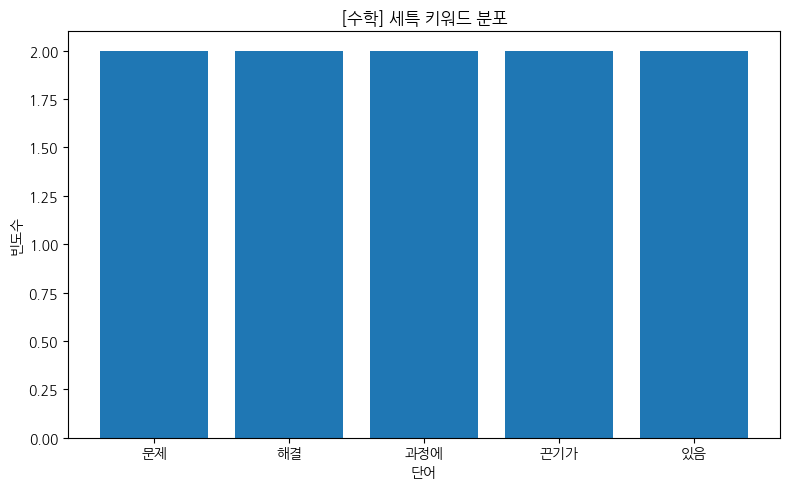

In [11]:

plt.figure(figsize=(8, 5))
plt.bar(단어목록, 빈도목록)
plt.title(f"[{target_subject}] 세특 키워드 분포")
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()